In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [8]:
img_height = 224
img_width = 224
input_shape = (img_width, img_height, 1)
batch_size = 8
train_dir = pathlib.Path('D:/Thesis_data/color_training_img')
test_dir  = pathlib.Path('D:/Thesis_data/color_testing_img')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/cacao_CNN/weight/')
model_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.h5')
model_plot_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.png')
classes = ['Brown', 'Others', 'Partially Purple', 'Purple', 'Slaty', 'White']

In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    color_mode="grayscale",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# 
test_ds = test_ds.prefetch(1)

Found 6048 files belonging to 6 classes.


In [4]:
for img,lab in test_ds.take(1):
    print(np.shape(img))

(8, 224, 224, 1)


In [27]:
Gx = np.array([[
    [-1, 0, 1,-2, 0, 2,-1, 0, -1]
]], dtype=np.float32)

Gy = np.array([[
    [1, 2, 1, 0, 0, 0, -1, -2, -1]
]], dtype=np.float32)

Gx = np.multiply(Gx, 0.125)
Gx = tf.Variable(tf.constant(Gx, shape=[3, 3, 1, 1]))

Gy = np.multiply(Gy, 0.125)
Gy = tf.Variable(tf.constant(Gy, shape=[3, 3, 1, 1]))

input_layer = layers.Input(shape=input_shape)
# contrast = tf.image.adjust_contrast(input_layer, 2)
# # # satu = tf.image.adjust_saturation(input_layer, 1.5)
bri = tf.image.adjust_brightness(input_layer,-30)
gx = tf.nn.conv2d(bri,Gx, strides=[1, 1, 1, 1], padding='VALID')
gy = tf.nn.conv2d(bri,Gy, strides=[1, 1, 1, 1], padding='VALID')
conc = layers.concatenate([gx, gy], axis=1)
model = keras.Model(input_layer, conc)
model.summary()
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# print(tsed)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.adjust_brightness_7 (  (None, 224, 224, 1)  0          ['input_11[0][0]']               
 TFOpLambda)                                                                                      
                                                                                                  
 tf.compat.v1.nn.conv2d_9 (TFOp  (None, 222, 222, 1)  0          ['tf.image.adjust_brightness_7[0]
 Lambda)                                                         [0]']                      

(8, 224, 224, 1)


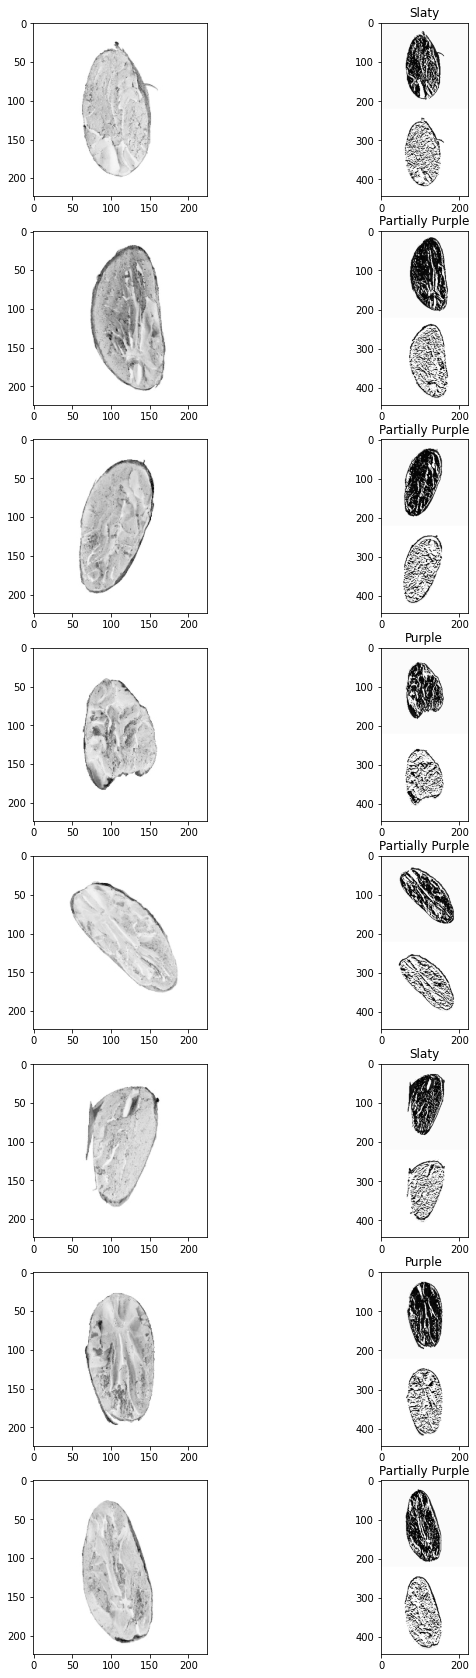

In [28]:
matplotlib.rcParams['figure.figsize'] = [10, 30]
i=0
for img_batch, lab_batch in test_ds.take(1):
    print(np.shape(img_batch))
    fed = model.predict_on_batch (img_batch)
    for k in range(batch_size):
        tt = classes[np.argmax(lab_batch[i])]
        # if (tt=="Slaty") or (tt=="Others") or (tt=="White"): 
        #     continue
        # else:
        plt.subplot(8,2,2*i+1)
        plt.imshow(np.asarray(img_batch[i].numpy(), dtype=np.uint8), cmap="Greys")
        plt.subplot(8,2,2*i+2)
        plt.imshow(np.asarray(fed[i], dtype=np.uint8), cmap="Greys")
        plt.title(tt)
        # print(tt)
        i=i+1